# Ex 12

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib.pyplot import figure
from time import time
seed=0
np.random.seed(seed) # fix random seed

In [2]:
start_time = time()

In [3]:
OTTIMIZZATORE = 'rmsprop'
LOSS = 'categorical_crossentropy'
BATCH = 120
EPOCHS = 10
BATCH_CONV = 120
EPOCHS_CONV = 10

### Exercise 12.1

By keeping fixed all the other parameters, try to use at least two other optimizers, different from SGD. <span style="color:red">Watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

pixel_rows = train_images.shape[1]
pixel_col = train_images.shape[2]

In [5]:
def prepare_data(array):
    array = array.reshape(array.shape[0], array.shape[1]*array.shape[2])
    return array.astype('float32')/255.


x_train = prepare_data(train_images)
x_test = prepare_data(test_images)
                      
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
def dense_model():
    model = models.Sequential()

    model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [7]:
network = dense_model()

network.compile(optimizer=OTTIMIZZATORE,
                loss=LOSS,
                metrics=['accuracy'])


In [8]:
history = network.fit(x_train, y_train, 
                     batch_size = BATCH,
                     epochs = EPOCHS,
                      validation_split = 0.1,
                     verbose=True,
                     shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 80us/sample - loss: 0.3339 - accuracy: 0.9021 - val_loss: 0.1243 - val_accuracy: 0.9663
Epoch 2/10
54000/54000 [==============================] - 3s 63us/sample - loss: 0.1636 - accuracy: 0.9517 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 3/10
54000/54000 [==============================] - 3s 64us/sample - loss: 0.1243 - accuracy: 0.9633 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 4/10
54000/54000 [==============================] - 4s 69us/sample - loss: 0.1053 - accuracy: 0.9695 - val_loss: 0.0784 - val_accuracy: 0.9772
Epoch 5/10
54000/54000 [==============================] - 4s 71us/sample - loss: 0.0914 - accuracy: 0.9724 - val_loss: 0.0719 - val_accuracy: 0.9812
Epoch 6/10
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0812 - accuracy: 0.9756 - val_loss: 0.0712 - val_accuracy: 0.9820
Epoch 7/10
54000/54000 [==============================] -

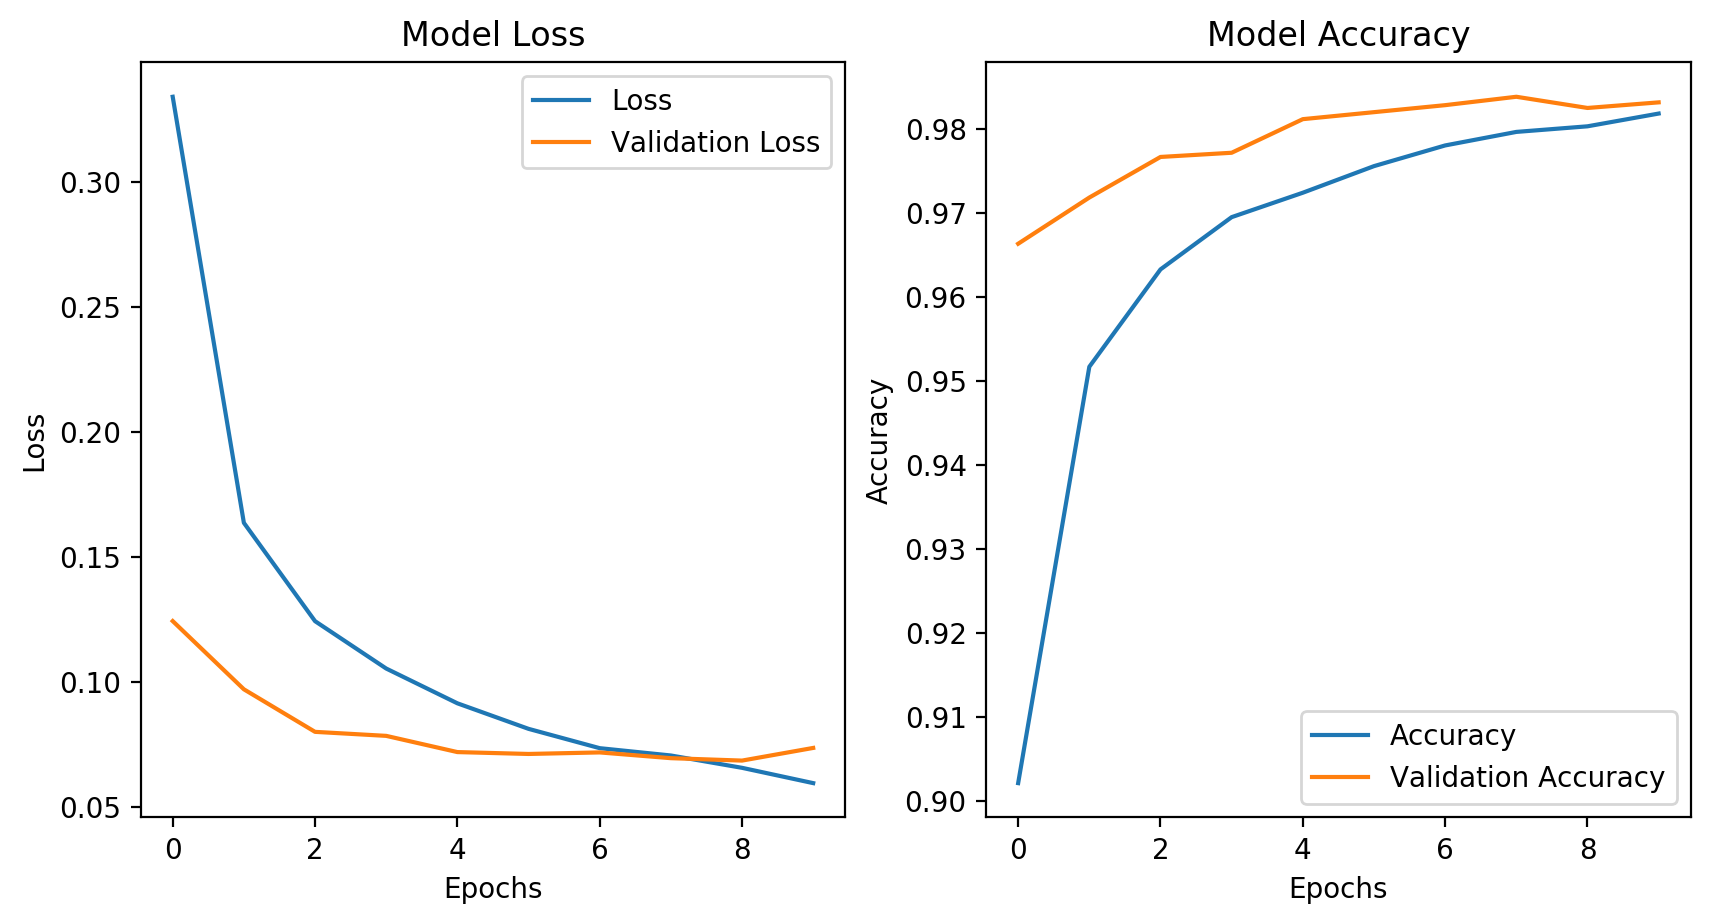

In [9]:
figure(figsize=((10,5)), dpi=200)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [10]:
network.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0743 - accuracy: 0.9809


[0.07427779253686094, 0.9809]

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [11]:
def prepare_data_conv(array):
    if keras.backend.image_data_format() == 'channels_first':
        array = array.reshape(array.shape[0], 1, array.shape[1], array.shape[2])
        shape = (1, array.shape[1], array.shape[2])
    else:
        array = array.reshape(array.shape[0], array.shape[1], array.shape[2], 1)
        shape = (array.shape[1], array.shape[2], 1)
    return array.astype('float32')/255., shape

x_train, INPUT_SHAPE = prepare_data_conv(train_images)
x_test, test_shape = prepare_data_conv(test_images)

In [12]:
def conv_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32,
                           (3,3),
                           activation='relu',
                           input_shape=INPUT_SHAPE))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu',))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu',))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [13]:
network_conv = conv_model()

network_conv.compile(optimizer=OTTIMIZZATORE, loss=LOSS, metrics=['accuracy'])

In [14]:
history = network_conv.fit(x_train, 
                y_train, 
                validation_split=0.1,
                verbose=True,
                batch_size=BATCH,
                epochs=5,
                shuffle=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 34s 623us/sample - loss: 0.2512 - accuracy: 0.9205 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 2/5
54000/54000 [==============================] - 33s 611us/sample - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0524 - val_accuracy: 0.9852
Epoch 3/5
54000/54000 [==============================] - 34s 636us/sample - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0450 - val_accuracy: 0.9880
Epoch 4/5
54000/54000 [==============================] - 37s 678us/sample - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 5/5
54000/54000 [==============================] - 35s 653us/sample - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0389 - val_accuracy: 0.9900


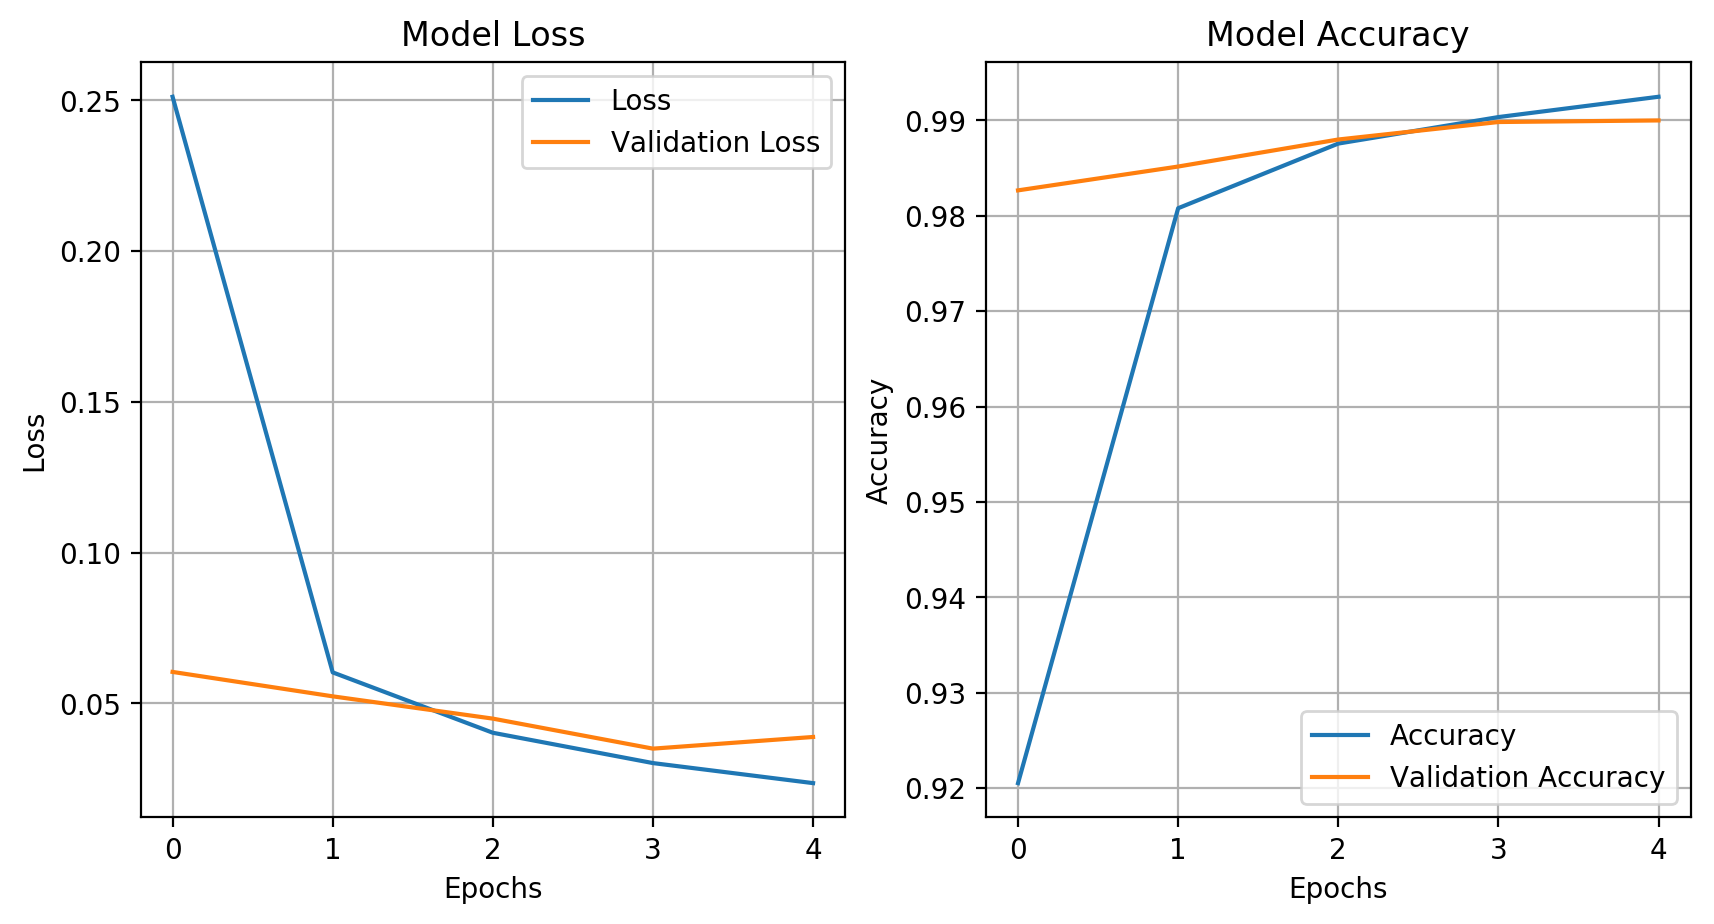

In [15]:
figure(figsize=((10,5)), dpi=200)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [16]:
network_conv.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 170us/sample - loss: 0.0286 - accuracy: 0.9911


[0.028594917718096986, 0.9911]

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit:

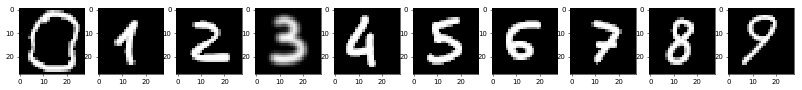

(28, 28)


In [17]:
from PIL import Image
import os
plt.figure(figsize=(20,40), dpi=50)

full_data = np.zeros((10,28,28))
for k in range(0,10):
    digit_filename = str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')
    pix=digit_in.load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j]=pix[j,i]
    
    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')
    full_data[k,:,:] = data[:,:]


            
#data /= 255


plt.show()

print(data.shape)


Test di accuratezza con i numeri scritti a mano da me.

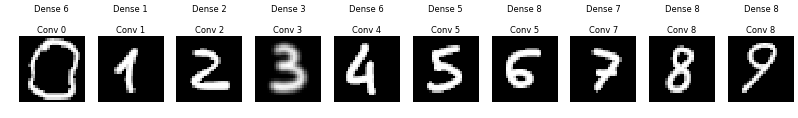

In [23]:
plt.figure(figsize=(20,40), dpi=50)

for k in range(0,10):
    data = full_data[k,:,:]
    data_conv = np.zeros((1,data.shape[0], data.shape[1]))
    data_conv[0,:,:] = data[:,:]
    data_conv, aa = prepare_data_conv(data_conv)
    data = data.reshape(1, 28*28)
    pred_0 = network.predict(data)
    pred_1 = network_conv.predict(data_conv)
    data = data.reshape(28,28)

    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Dense {}".format(np.argmax(pred_0))+"\n \nConv {}".format(np.argmax(pred_1)))
    plt.axis('off') 



plt.show()

Test di accuratezza con alcune cifre sempre dal ```MNIST```.

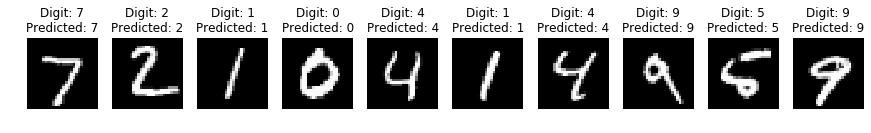

In [19]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = network_conv.predict(x_test)

x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

In [20]:
end_time = time()

In [21]:
minutes = int((end_time - start_time)/60.)
seconds = int((end_time - start_time) - minutes*60)

In [22]:
print("Computation time: ", minutes, "min ", seconds, "sec.")

Computation time:  3 min  40 sec.
